# 任务1：数据读取

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 1.巡游车GPS数据读取

In [3]:
import pandas as pd
import numpy as np

In [4]:
# 文件读取行数
MAX_ROWS = 100000 
# DDA
taxigps2019 = pd.read_csv('taxiGps20190531.csv', nrows=MAX_ROWS) #由于数据很大，可以设置只读最大行数
taxigps2019.describe()

,OPERATING_STATUS,GPS_SPEED,DRIVING_DIRECTION,LONGITUDE,LATITUDE
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.415830,15.922179,161.451510,117.388134,24.354396
std,2.320472,22.837529,113.725946,9.273066,1.932351
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,59.000000,118.100982,24.480172
50%,1.000000,0.000000,167.000000,118.123175,24.493398
75%,6.000000,28.900000,261.000000,118.149498,24.516875
max,8.000000,381.300000,360.000000,129.110960,34.656481


In [5]:
taxigps2019

,OPERATING_STATUS,GPS_SPEED,DRIVING_DIRECTION,GPS_TIME,LONGITUDE,LATITUDE,CARNO
0,1,0.0,0,2019/5/31 0:00:05,118.098451,24.493498,c3e622b913ca7085db129fa379121b90
1,1,0.0,4,2019/5/31 0:00:08,118.055053,24.564395,9b4802bcb6344a5772814557428aee85
2,1,0.0,0,2019/5/31 0:00:09,0.000000,0.000000,f7e16e0e76abf3460007f65cb1509565
3,1,0.0,0,2019/5/31 0:00:10,0.000000,0.000000,c607b7a160ab91bf05f8085ed221196f
4,1,0.8,32,2019/5/31 0:00:12,117.990452,24.569882,7be62de4645772356a3bb7190bc54c6d
...,...,...,...,...,...,...,...
99995,1,0.0,186,2019/5/31 1:37:06,118.121760,24.504625,17a4e9599fd2e58f7d037d42336b022e
99996,1,0.0,174,2019/5/31 1:37:06,118.163555,24.506240,5aba323aa96d7879290dedd1491900ff
99997,1,0.0,88,2019/5/31 1:37:06,118.158875,24.527685,22e9626122f2861dcf074111e4dcb472
99998,1,0.0,339,2019/5/31 1:37:06,118.178138,24.473796,54efc9187b2234389797d722d1ec403f


In [6]:
taxigps2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
OPERATING_STATUS     100000 non-null int64
GPS_SPEED            100000 non-null float64
DRIVING_DIRECTION    100000 non-null int64
GPS_TIME             100000 non-null object
LONGITUDE            100000 non-null float64
LATITUDE             100000 non-null float64
CARNO                100000 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 5.3+ MB


通过describe()和info()函数，我们可以初步得到现有的字段的取值，10w条数据占用5MB内存。我们也可以完成数据字段压缩的操作，将字段类型根据取值空间进行修改，压缩内存使用需求。

In [7]:
import pandas as pd
import numpy as np

# 压缩内存，适合处理大数据节约内存
MAX_ROWS = 100000 # 文件读取行数

# dtype的使用
taxigps2019 = pd.read_csv('taxiGps20190531.csv', nrows=MAX_ROWS,
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,  # 正的值精确度要求无需太高，无符号
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float16 
                         })

taxigps2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
OPERATING_STATUS     100000 non-null uint8
GPS_SPEED            100000 non-null float16
DRIVING_DIRECTION    100000 non-null uint16
GPS_TIME             100000 non-null object
LONGITUDE            100000 non-null float32
LATITUDE             100000 non-null float32
CARNO                100000 non-null object
dtypes: float16(1), float32(2), object(2), uint16(1), uint8(1)
memory usage: 2.8+ MB


【思考】还有没有其它压缩内存使用的方法来读取文件？

In [ ]:
【回答】可以分块读取，pd.read_csv(data,chunksize=10000)这样。

为了方便查看数据，我们还可以对GPS数据进行排序，这样就完成了单个文件的读取。

In [13]:
taxigps2019.columns[::-1] #列倒序排列

Index(['CARNO', 'LATITUDE', 'LONGITUDE', 'GPS_TIME', 'DRIVING_DIRECTION',
       'GPS_SPEED', 'OPERATING_STATUS'],
      dtype='object')

In [14]:
# df.sort_values()函数使用
taxigps2019 = taxigps2019[taxigps2019.columns[::-1]] # 把CARNO放在最前面
taxigps2019.sort_values(by=['CARNO','GPS_TIME'], inplace=True) #优先排CARNO,然后GPS_TIME，并置换不生成副本，覆盖原数据
taxigps2019.reset_index(inplace=True, drop=True) # 数据清洗可能会使索引顺序混乱，重新设置连续索引，丢弃原有的索引，并覆盖
taxigps2019.head()

,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS
0,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:20,292,0.0,1
1,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:35,292,0.0,1
2,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:50,292,0.0,1
3,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:32:05,292,0.0,1
4,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:32:20,292,0.0,1


多个文件（多天）可以直接将文件进行拼接即可：

In [15]:
# 出租车2019年GPS，pd.concat()函数的使用
taxigps2019 = pd.concat([
    pd.read_csv('taxiGps20190531.csv', nrows=MAX_ROWS,
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float16 
                         }),
    pd.read_csv('taxiGps20190603.csv', nrows=MAX_ROWS,
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float16 
                         })
])
taxigps2019 = taxigps2019[taxigps2019.columns[::-1]]
taxigps2019.sort_values(by=['CARNO','GPS_TIME'], inplace=True)
taxigps2019.reset_index(inplace=True)

In [18]:
taxigps2019

,index,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS
0,7622,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:20,292,0.0,1
1,11509,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:35,292,0.0,1
2,15763,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:50,292,0.0,1
3,19754,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:32:05,292,0.0,1
4,23693,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:32:20,292,0.0,1
...,...,...,...,...,...,...,...,...
199995,60006,fff20f025f560278d601b2fd47e1f6b7,24.638252,118.070869,2019/6/3 8:44:18,246,0.0,1
199996,68389,fff20f025f560278d601b2fd47e1f6b7,24.638252,118.070869,2019/6/3 8:44:49,246,0.0,1
199997,77307,fff20f025f560278d601b2fd47e1f6b7,24.638252,118.070869,2019/6/3 8:45:19,246,0.0,1
199998,85581,fff20f025f560278d601b2fd47e1f6b7,24.638252,118.070869,2019/6/3 8:45:49,246,0.0,1


In [16]:
taxigps2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
index                200000 non-null int64
CARNO                200000 non-null object
LATITUDE             200000 non-null float32
LONGITUDE            200000 non-null float32
GPS_TIME             200000 non-null object
DRIVING_DIRECTION    200000 non-null uint16
GPS_SPEED            200000 non-null float16
OPERATING_STATUS     200000 non-null uint8
dtypes: float16(1), float32(2), int64(1), object(2), uint16(1), uint8(1)
memory usage: 7.1+ MB


## 2.巡游车订单读取

巡游车订单数据单个文件读取：

In [120]:
taxiorder2019 = pd.read_csv('taxiOrder20190531.csv', nrows=MAX_ROWS,
                           dtype = {
                               'GETON_LONGITUDE': np.float32,
                               'GETON_LATITUDE': np.float32,
                               'GETOFF_LONGITUDE': np.float32,
                               'GETOFF_LATITUDE': np.float32,
                               'PASS_MILE': np.float16,
                               'NOPASS_MILE': np.float16,
                               'WAITING_TIME': np.float16
                           })
type(taxiorder2019.head())
taxiorder2019 = taxiorder2019.rename(columns={'CAR_NO':'CARNO'}) #columns改名，和GPS数据统一
taxiorder2019.sort_values(by=['CARNO','GETON_DATE'], inplace=True) #关注上车时间
taxiorder2019.reset_index(inplace=True, drop=True)

pandas.core.frame.DataFrame

巡游车订单数据多个文件读取：

In [18]:
taxiorder2019 = pd.concat([
    pd.read_csv('taxiOrder20190531.csv', nrows=MAX_ROWS,
                           dtype = {
                               'GETON_LONGITUDE': np.float32,
                               'GETON_LATITUDE': np.float32,
                               'GETOFF_LONGITUDE': np.float32,
                               'GETOFF_LATITUDE': np.float32,
                               'PASS_MILE': np.float16,
                               'NOPASS_MILE': np.float16,
                               'WAITING_TIME': np.float16
                           }),
    pd.read_csv('taxiOrder20190601.csv', nrows=MAX_ROWS,
                           dtype = {
                               'GETON_LONGITUDE': np.float32,
                               'GETON_LATITUDE': np.float32,
                               'GETOFF_LONGITUDE': np.float32,
                               'GETOFF_LATITUDE': np.float32,
                               'PASS_MILE': np.float16,
                               'NOPASS_MILE': np.float16,
                               'WAITING_TIME': np.float16
                           })
])
taxiorder2019 = taxiorder2019.rename(columns={'CAR_NO':'CARNO'})
taxiorder2019.sort_values(by=['CARNO','GETON_DATE'], inplace=True)
taxiorder2019.reset_index(inplace=True, drop=True)

## 3.网约车GPS数据读取

In [19]:
wycgps2019 = pd.read_csv('wycGps20190531.csv', nrows=MAX_ROWS,
                        dtype={
                            'LONGITUDE': np.float32,
                            'LATITUDE': np.float32,
                            'SPEED': np.float16
                        })

wycgps2019 = wycgps2019.rename(columns={'CAR_NO':'CARNO'})
wycgps2019 = wycgps2019[wycgps2019.columns[::-1]]
wycgps2019.sort_values(by=['CARNO','POSITION_TIME'], inplace=True)

wycgps2019['BIZ_STATUS'] = wycgps2019['BIZ_STATUS'].fillna(-1).astype(np.int8) #缺失值填充，类型转换
wycgps2019['ENCRYPT'] = wycgps2019['ENCRYPT'].fillna(-1).astype(np.int8) 

## 4.网约车订单数据读取

In [20]:
wycorder2019 = pd.read_csv('wycOrder20190531.csv', nrows=MAX_ROWS,
                        dtype={
                            'DEP_LONGITUDE': np.float32,
                            'DEP_LATITUDE': np.float32,
                            'DEST_LONGITUDE': np.float32,
                            'DEST_LATITUDE': np.float32,
                        })
wycorder2019 = wycorder2019.rename(columns={'CAR_NO':'CARNO'})
wycorder2019.sort_values(by=['CARNO','DEP_TIME'], inplace=True) 

# 数据统计

In [21]:
#有多少辆出租车
taxigps2019['CARNO'].nunique()

6699

In [22]:
#出租车平均GPS速度,np.clip()函数的使用
np.clip(taxigps2019['GPS_SPEED'].values, 0, 150).mean() #取0-150的速度值，超过这个范围的以离得近的端点取值

16.72

【思考】离群点的处理还有什么其它方法吗？

【回答】异常值分析 → 3σ原则 / 箱型图分析  
&emsp;&emsp;&emsp;&emsp;异常值处理方法 → 删除 / 修正填补

【参考】[Numpy 中clip函数的使用](https://blog.csdn.net/qq1483661204/article/details/78150203)  
&emsp;&emsp;&emsp;&emsp;[python —— 异常值处理](https://www.jianshu.com/p/8e6d81c839e8)

In [23]:
#出租车运营状态统计
taxigps2019['OPERATING_STATUS'].value_counts()

1    119940
6     77465
8      2595
Name: OPERATING_STATUS, dtype: int64

In [24]:
#某辆巡游车数据
taxigps2019[taxigps2019['CARNO'] == '0006d282be70d06881a7513b69fcaa60']

,index,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS
0,7622,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:20,292,0.000000,1
1,11509,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:35,292,0.000000,1
2,15763,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:31:50,292,0.000000,1
3,19754,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:32:05,292,0.000000,1
4,23693,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:32:20,292,0.000000,1
5,27572,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:32:35,292,0.000000,1
6,31680,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:32:50,292,0.000000,1
7,35934,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:33:05,292,0.000000,1
8,39853,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:33:20,292,0.000000,1
9,43631,0006d282be70d06881a7513b69fcaa60,24.479755,118.146935,2019/5/31 1:33:35,292,0.000000,1


In [25]:
#某个运行方向的车辆统计
taxigps2019[taxigps2019['DRIVING_DIRECTION'] == 10]['CARNO'].unique()

array(['01b6345d172155fce5c9422ebf7ecfd7',
       '02d0b1ee4ab26e697cd34c599285e502',
       '02ef92d251760486d99663319ef0b22f',
       '0332ffecc737fb3b14ea6f553727c780',
       '049602e84069d4edd23a5f118acf2847',
       '04bf7117ad89c16d402046dc110cae0f',
       '04f2300ee787e6b9387e056c3bca7c04',
       '059843df5f7395d74bea7564464da438',
       '05bfd59402cc350ff5526b7868272fb4',
       '066342daae6980fc626a7ed44b79bd30',
       '06719405f498a2454b1bfd503607c58e',
       '076c4fd3d6c504396e72328f24d9644c',
       '0781cbd09b4dfdcb24ab6801ca3f7807',
       '07f1009106ee195aa6c5b23b8f286bd4',
       '082c969ac9f426ef08267b8c895b30be',
       '08be345e776bb0d51303e9812dcc8b91',
       '08fec53a1a9d5b76f7b4770d088466fa',
       '099256853a429e8db47ee3a21b6475a3',
       '09a77490a3a232b71ea4a88ccf1a27a7',
       '0a43922458d8d103a7e96d36a9bacd7c',
       '0b83df2a2691a99490daef10c32868e3',
       '0c65746b1fb73b65caaef9f47225b505',
       '0d05c9f4efb7eb39d352d46c4c43a1b7',
       '0d1

In [26]:
#统计记录最多的GPS小时
taxigps2019['GPS_TIME'] = pd.to_datetime(taxigps2019['GPS_TIME']) #转化成时间类型


In [27]:
taxigps2019['GPS_TIME'].dt.hour.value_counts() #dt.hour的用法

1    98242
8    94594
0     2796
7     1267
6      912
5      858
4      559
3      411
2      361
Name: GPS_TIME, dtype: int64

【参考】[Python时间日期格式化之time与datetime模块总结](https://www.cnblogs.com/chenhuabin/p/10099766.html)

## 课堂任务 

1. 统计出租车在一天的有效运行时间。

In [ ]:
【回答】根据某出租车一天的某订单上下车时间算有效运行时间

In [64]:
taxiorder2019

,CARNO,GETON_DATE,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_DATE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME
0,0006d282be70d06881a7513b69fcaa60,2019-05-31 00:08:00,118.155060,24.506035,2019-05-31 00:13:00,118.176666,24.509895,3.099609,1.299805,62.0
1,0006d282be70d06881a7513b69fcaa60,2019-05-31 02:30:00,118.154999,24.488607,2019-05-31 02:46:00,118.188156,24.498117,7.300781,0.000000,326.0
2,0006d282be70d06881a7513b69fcaa60,2019-05-31 07:47:00,118.155083,24.506119,2019-05-31 08:00:00,118.181938,24.531134,4.398438,16.906250,328.0
3,0006d282be70d06881a7513b69fcaa60,2019-05-31 08:19:00,118.146347,24.515144,2019-05-31 08:32:00,118.112679,24.520956,4.601562,0.000000,254.0
4,0006d282be70d06881a7513b69fcaa60,2019-05-31 08:43:00,118.129448,24.496716,2019-05-31 08:56:00,118.157806,24.486753,3.300781,0.199951,438.0
...,...,...,...,...,...,...,...,...,...,...
99995,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 17:29:00,118.118919,24.431156,2019-05-31 17:46:00,118.072929,24.465965,7.898438,2.400391,272.0
99996,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 19:58:00,118.096771,24.592213,2019-05-31 20:36:00,118.080887,24.464451,21.296875,1.299805,589.0
99997,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 21:30:00,118.077835,24.454510,2019-05-31 21:52:00,118.119095,24.431002,10.500000,0.199951,385.0
99998,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 22:37:00,118.115067,24.483564,2019-05-31 22:53:00,118.076080,24.491131,5.300781,0.000000,400.0


In [70]:
taxiorder2019[['CARNO','GETON_DATE','GETOFF_DATE','WAITING_TIME']]

,CARNO,GETON_DATE,GETOFF_DATE,WAITING_TIME
0,0006d282be70d06881a7513b69fcaa60,2019-05-31 00:08:00,2019-05-31 00:13:00,62.0
1,0006d282be70d06881a7513b69fcaa60,2019-05-31 02:30:00,2019-05-31 02:46:00,326.0
2,0006d282be70d06881a7513b69fcaa60,2019-05-31 07:47:00,2019-05-31 08:00:00,328.0
3,0006d282be70d06881a7513b69fcaa60,2019-05-31 08:19:00,2019-05-31 08:32:00,254.0
4,0006d282be70d06881a7513b69fcaa60,2019-05-31 08:43:00,2019-05-31 08:56:00,438.0
...,...,...,...,...
99995,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 17:29:00,2019-05-31 17:46:00,272.0
99996,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 19:58:00,2019-05-31 20:36:00,589.0
99997,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 21:30:00,2019-05-31 21:52:00,385.0
99998,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 22:37:00,2019-05-31 22:53:00,400.0


In [74]:
taxiorder2019['GETON_DATE'] = pd.to_datetime(taxiorder2019['GETON_DATE'])
taxiorder2019['GETOFF_DATE'] = pd.to_datetime(taxiorder2019['GETOFF_DATE'])

In [89]:
taxiorder2019['GETOFF_DATE']

0       2019-05-31 00:13:00
1       2019-05-31 02:46:00
2       2019-05-31 08:00:00
3       2019-05-31 08:32:00
4       2019-05-31 08:56:00
                ...        
99995   2019-05-31 17:46:00
99996   2019-05-31 20:36:00
99997   2019-05-31 21:52:00
99998   2019-05-31 22:53:00
99999   2019-05-31 23:14:00
Name: GETOFF_DATE, Length: 100000, dtype: datetime64[ns]

In [75]:
taxiorder2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
CARNO               100000 non-null object
GETON_DATE          100000 non-null datetime64[ns]
GETON_LONGITUDE     100000 non-null float32
GETON_LATITUDE      100000 non-null float32
GETOFF_DATE         100000 non-null datetime64[ns]
GETOFF_LONGITUDE    100000 non-null float32
GETOFF_LATITUDE     100000 non-null float32
PASS_MILE           100000 non-null float16
NOPASS_MILE         100000 non-null float16
WAITING_TIME        100000 non-null float16
dtypes: datetime64[ns](2), float16(3), float32(4), object(1)
memory usage: 4.4+ MB


In [82]:
OPERATING_TIME=taxiorder2019['GETOFF_DATE']-taxiorder2019['GETON_DATE']
OPERATING_TIME

0       00:05:00
1       00:16:00
2       00:13:00
3       00:13:00
4       00:13:00
          ...   
99995   00:17:00
99996   00:38:00
99997   00:22:00
99998   00:16:00
99999   00:14:00
Length: 100000, dtype: timedelta64[ns]

pandas.core.series.Series

In [97]:
taxiorder2019['OPERATING_TIME']=OPERATING_TIME
taxiorder2019
OPERATING_TIME.dt.seconds

,CARNO,GETON_DATE,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_DATE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME,OPERATING_TIME
0,0006d282be70d06881a7513b69fcaa60,2019-05-31 00:08:00,118.155060,24.506035,2019-05-31 00:13:00,118.176666,24.509895,3.099609,1.299805,62.0,00:05:00
1,0006d282be70d06881a7513b69fcaa60,2019-05-31 02:30:00,118.154999,24.488607,2019-05-31 02:46:00,118.188156,24.498117,7.300781,0.000000,326.0,00:16:00
2,0006d282be70d06881a7513b69fcaa60,2019-05-31 07:47:00,118.155083,24.506119,2019-05-31 08:00:00,118.181938,24.531134,4.398438,16.906250,328.0,00:13:00
3,0006d282be70d06881a7513b69fcaa60,2019-05-31 08:19:00,118.146347,24.515144,2019-05-31 08:32:00,118.112679,24.520956,4.601562,0.000000,254.0,00:13:00
4,0006d282be70d06881a7513b69fcaa60,2019-05-31 08:43:00,118.129448,24.496716,2019-05-31 08:56:00,118.157806,24.486753,3.300781,0.199951,438.0,00:13:00
...,...,...,...,...,...,...,...,...,...,...,...
99995,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 17:29:00,118.118919,24.431156,2019-05-31 17:46:00,118.072929,24.465965,7.898438,2.400391,272.0,00:17:00
99996,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 19:58:00,118.096771,24.592213,2019-05-31 20:36:00,118.080887,24.464451,21.296875,1.299805,589.0,00:38:00
99997,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 21:30:00,118.077835,24.454510,2019-05-31 21:52:00,118.119095,24.431002,10.500000,0.199951,385.0,00:22:00
99998,fff20f025f560278d601b2fd47e1f6b7,2019-05-31 22:37:00,118.115067,24.483564,2019-05-31 22:53:00,118.076080,24.491131,5.300781,0.000000,400.0,00:16:00


0         300
1         960
2         780
3         780
4         780
         ... 
99995    1020
99996    2280
99997    1320
99998     960
99999     840
Length: 100000, dtype: int64

In [63]:
import pandas as pd
import numpy as np
# 压缩内存，适合处理大数据节约内存
MAX_ROWS = 100000 # 文件读取行数

# dtype的使用
taxigps2019 = pd.read_csv('taxiGps20190531.csv', nrows=MAX_ROWS,
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,  # 正的值精确度要求无需太高，无符号
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float16 
                         })
taxigps2019 = taxigps2019[taxigps2019.columns[::-1]]
taxigps2019.sort_values(by=['CARNO','GPS_TIME'], inplace=True)
taxigps2019.reset_index(inplace=True)
taxigps2019['GPS_TIME'] = pd.to_datetime(taxigps2019['GPS_TIME'])
taxigps2019['GPS_TIME'][taxigps2019['CARNO'] == '0006d282be70d06881a7513b69fcaa60'][taxigps2019['OPERATING_STATUS'] == ( 1 or 6 or 8 )]

0    2019-05-31 01:31:20
1    2019-05-31 01:31:35
2    2019-05-31 01:31:50
3    2019-05-31 01:32:05
4    2019-05-31 01:32:20
5    2019-05-31 01:32:35
6    2019-05-31 01:32:50
7    2019-05-31 01:33:05
8    2019-05-31 01:33:20
9    2019-05-31 01:33:35
10   2019-05-31 01:33:50
11   2019-05-31 01:34:05
12   2019-05-31 01:34:20
13   2019-05-31 01:34:35
14   2019-05-31 01:34:50
15   2019-05-31 01:35:05
16   2019-05-31 01:35:20
17   2019-05-31 01:35:35
18   2019-05-31 01:35:50
19   2019-05-31 01:36:05
20   2019-05-31 01:36:20
21   2019-05-31 01:36:35
22   2019-05-31 01:36:50
23   2019-05-31 01:37:05
Name: GPS_TIME, dtype: datetime64[ns]

In [100]:
taxigps2019['OPERATING_STATUS'].value_counts()

1    72569
6    25217
8     2214
Name: OPERATING_STATUS, dtype: int64

2. 统计某个出租车的行驶距离。

In [ ]:
统计20190531某车行驶总距离

In [104]:
taxiorder2019['PASS_MILE'][taxigps2019['CARNO'] == '0006d282be70d06881a7513b69fcaa60'].sum()+taxiorder2019['NOPASS_MILE'][taxigps2019['CARNO'] == '0006d282be70d06881a7513b69fcaa60'].sum()

175.0

3. 找到数据中的异常值

【回答】利用3σ原则 / 箱型图分析 

<AxesSubplot:ylabel='GPS_SPEED'>

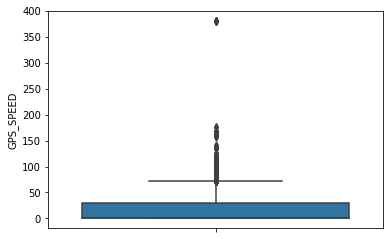

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(y=taxigps2019.GPS_SPEED)

## 打卡任务

1. 统计巡游车GPS数据在20190603中包含多少俩出租车🚖？

In [328]:
# 读入20190603出租车的GPS和订单

path='taxiOrder20190603.csv'
# chunksize return TextParser
chunker=pd.read_csv(path,chunksize=100000)
 
# an array of Series
tot=pd.Series([])
chunkercount=0
for piece in chunker:
	print('------------piece[key] value_counts start-----------')
	#piece is a DataFrame,lenth is chunksize=100000,and piece[key] is a Series ,key is int ,value is the key column
	print(piece.CAR_NO.value_counts())
	print('------------piece[key] value_counts end-------------')
	#piece[key] value_counts is a Series ,key is the key column, and value is the key count
	tot=tot.add(piece.CAR_NO.value_counts(),fill_value=0)
	chunkercount+=1


------------piece[key] value_counts start-----------
f8bbcb89ccc1bffa2b92a523dc221b82    44
2b26ec0b5dfa34f1444728b2708c229f    43
1deaade1702863cd69cee083704274a1    42
534bdbed47dcca1d74cd7042c45295ae    41
8233a0da71f615e975f406b78c58c557    40
                                    ..
e92853cd2d9604fb8b2cee24e470c360     1
6dc5d9758d67b752361ddb3aee0ba5bf     1
7a3684b05b38656ba8f104db746bdfd1     1
435948badbcd068529c205cc4f426bb3     1
f2553b7a55886d669d41cde03440202b     1
Name: CAR_NO, Length: 5390, dtype: int64
------------piece[key] value_counts end-------------
------------piece[key] value_counts start-----------
b39b07b73157d3eff2d1dd7ff2003d41    43
352da70888c724cc3423ae8a94e7d0e8    42
d6f667c4669116398c18b61efc04e8b4    39
b1461a4aa96afd8914333c25c0b9950f    38
a8fbcf846f242161abfadf43c25b74f7    37
                                    ..
667386b4668765292e8212e46d63d67d     1
0b189e9a9b00b59f4822743dbe768883     1
33fcac4b70090808ca61b0a88ad6ad03     1
d1283e960f377ece22c0

【注意】统计用float32比较好

In [139]:
#last order the series
tot=tot.sort_values(ascending=False)
print(chunkercount)
print('--------------')
print(tot)

3
--------------
2a3a73ae3bacf50e22d9eb3bff15387e    122.0
ebb84b20f47e2530509666b0e3207a84    122.0
d4d1b9a8c7fd5dba9bf514956b5d0614    112.0
aa805c58299897f971c169b5b0513741    105.0
c4c200bdbf9a0b217e551f8c35dd7da9    104.0
                                    ...  
9fb93ceebc73629239c13789370357f3      1.0
0b189e9a9b00b59f4822743dbe768883      1.0
5b661903dc977f0f4cbb6cde10685e9e      1.0
1689ee9f3d215cd3de370c4f9c9b3572      1.0
9f49b5866f6dd2012eb9c25c8a5d9786      1.0
Length: 5459, dtype: float64


In [124]:
# 读入20190603出租车的GPS和订单
taxiorder20190603 = pd.read_csv('taxiOrder20190603.csv', 
                           dtype = {
                               'GETON_LONGITUDE': np.float32,
                               'GETON_LATITUDE': np.float32,
                               'GETOFF_LONGITUDE': np.float32,
                               'GETOFF_LATITUDE': np.float32,
                               'PASS_MILE': np.float16,
                               'NOPASS_MILE': np.float16,
                               'WAITING_TIME': np.float16
                               })
taxiorder20190603

,CAR_NO,GETON_DATE,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_DATE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME
0,91856bf24bf21e5a65fc254ca559ea5d,2019-06-03 04:09:00,118.120911,24.481655,2019-06-03 04:16:00,0.000000,0.000000,4.000000,1.400391,60.0
1,91856bf24bf21e5a65fc254ca559ea5d,2019-06-03 08:58:00,118.119987,24.427582,2019-06-03 09:20:00,118.072258,24.483841,9.898438,3.900391,360.0
2,91856bf24bf21e5a65fc254ca559ea5d,2019-06-03 09:45:00,118.147514,24.477007,2019-06-03 09:51:00,118.145660,24.450691,3.699219,5.800781,0.0
3,91856bf24bf21e5a65fc254ca559ea5d,2019-06-03 12:34:00,118.118790,24.430962,2019-06-03 12:54:00,118.087639,24.437870,6.398438,6.000000,420.0
4,91856bf24bf21e5a65fc254ca559ea5d,2019-06-03 12:55:00,118.088020,24.437637,2019-06-03 13:02:00,118.110519,24.436117,2.699219,0.099976,60.0
...,...,...,...,...,...,...,...,...,...,...
224719,8f67c648ac2c033647f7bea84f6d1fa6,2019-06-03 00:43:00,118.154945,24.482971,2019-06-03 00:50:00,118.154144,24.506346,3.500000,0.899902,120.0
224720,8f67c648ac2c033647f7bea84f6d1fa6,2019-06-03 08:38:00,118.098595,24.523174,2019-06-03 08:51:00,118.111305,24.497181,5.500000,0.300049,240.0
224721,8f67c648ac2c033647f7bea84f6d1fa6,2019-06-03 11:14:00,118.167450,24.509117,2019-06-03 11:24:00,118.158997,24.527704,3.800781,4.898438,180.0
224722,8f67c648ac2c033647f7bea84f6d1fa6,2019-06-03 11:24:00,118.158974,24.527733,2019-06-03 11:31:00,118.171814,24.508978,2.599609,0.000000,120.0


In [125]:
taxiorder20190603 = taxiorder20190603.rename(columns={'CAR_NO':'CARNO'}) #columns改名，和GPS数据统一
taxiorder20190603.sort_values(by=['CARNO','GETON_DATE'], inplace=True) #关注下车时间
taxiorder20190603.reset_index(inplace=True, drop=True)
taxiorder20190603.info()
taxiorder20190603.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224724 entries, 0 to 224723
Data columns (total 10 columns):
CARNO               224724 non-null object
GETON_DATE          224724 non-null object
GETON_LONGITUDE     224724 non-null float32
GETON_LATITUDE      224724 non-null float32
GETOFF_DATE         224724 non-null object
GETOFF_LONGITUDE    224724 non-null float32
GETOFF_LATITUDE     224724 non-null float32
PASS_MILE           224724 non-null float16
NOPASS_MILE         224724 non-null float16
WAITING_TIME        224724 non-null float16
dtypes: float16(3), float32(4), object(3)
memory usage: 9.9+ MB


,CARNO,GETON_DATE,GETON_LONGITUDE,GETON_LATITUDE,GETOFF_DATE,GETOFF_LONGITUDE,GETOFF_LATITUDE,PASS_MILE,NOPASS_MILE,WAITING_TIME
0,0006d282be70d06881a7513b69fcaa60,2019-06-03 00:11:00,118.130676,24.520460,2019-06-03 00:15:00,118.121704,24.515245,1.500000,7.199219,107.0
1,0006d282be70d06881a7513b69fcaa60,2019-06-03 00:16:00,118.119225,24.518341,2019-06-03 00:25:00,118.159363,24.527805,4.500000,0.500000,90.0
2,0006d282be70d06881a7513b69fcaa60,2019-06-03 00:39:00,118.159569,24.527887,2019-06-03 00:55:00,118.105377,24.519215,7.601562,0.000000,247.0
3,0006d282be70d06881a7513b69fcaa60,2019-06-03 00:58:00,118.107552,24.519096,2019-06-03 01:09:00,118.106651,24.477125,5.500000,0.500000,190.0
4,0006d282be70d06881a7513b69fcaa60,2019-06-03 01:15:00,118.116348,24.481958,2019-06-03 01:19:00,118.112701,24.487860,1.500000,1.299805,41.0


In [131]:
taxigps20190603 = pd.read_csv('taxiGps20190603.csv', 
                         dtype = {
                             'DRIVING_DIRECTION': np.uint16,  # 正的值精确度要求无需太高，无符号
                             'OPERATING_STATUS': np.uint8,
                             'LONGITUDE': np.float32,
                             'LATITUDE': np.float32,
                             'GPS_SPEED': np.float16 
                         })
taxigps20190603 = taxigps20190603[taxigps20190603.columns[::-1]] # 把CARNO放在最前面
taxigps20190603.sort_values(by=['CARNO','GPS_TIME'], inplace=True) #优先排CARNO,然后GPS_TIME，并置换不生成副本，覆盖原数据
taxigps20190603.reset_index(inplace=True, drop=True) # 数据清洗可能会使索引顺序混乱，重新设置连续索引，丢弃原有的索引，并覆盖
taxigps20190603.info()
taxigps20190603

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845106 entries, 0 to 15845105
Data columns (total 7 columns):
CARNO                object
LATITUDE             float32
LONGITUDE            float32
GPS_TIME             object
DRIVING_DIRECTION    uint16
GPS_SPEED            float16
OPERATING_STATUS     uint8
dtypes: float16(1), float32(2), object(2), uint16(1), uint8(1)
memory usage: 438.2+ MB


,CARNO,LATITUDE,LONGITUDE,GPS_TIME,DRIVING_DIRECTION,GPS_SPEED,OPERATING_STATUS
0,0006d282be70d06881a7513b69fcaa60,24.497171,118.111893,2019/6/3 10:00:06,63,74.000000,6
1,0006d282be70d06881a7513b69fcaa60,24.498400,118.114586,2019/6/3 10:00:21,63,72.187500,6
2,0006d282be70d06881a7513b69fcaa60,24.499569,118.117264,2019/6/3 10:00:36,63,70.312500,6
3,0006d282be70d06881a7513b69fcaa60,24.500666,118.119690,2019/6/3 10:00:51,60,61.093750,6
4,0006d282be70d06881a7513b69fcaa60,24.501734,118.122124,2019/6/3 10:01:06,63,72.187500,6
...,...,...,...,...,...,...,...
15845101,fff20f025f560278d601b2fd47e1f6b7,24.622677,118.237999,2019/6/3 9:58:25,168,0.000000,6
15845102,fff20f025f560278d601b2fd47e1f6b7,24.622677,118.237999,2019/6/3 9:58:25,168,0.000000,6
15845103,fff20f025f560278d601b2fd47e1f6b7,24.621698,118.238037,2019/6/3 9:58:49,242,21.000000,6
15845104,fff20f025f560278d601b2fd47e1f6b7,24.621834,118.236542,2019/6/3 9:59:19,284,0.000000,6


In [144]:
taxigps20190603.CARNO.nunique()

6727

In [145]:
taxiorder2019.CARNO.nunique()

5463

【回答】统计巡游车GPS数据在20190603中包含6727俩出租车🚖

2. 统计网约车GPS数据在20190603中包含多少俩网约车🚗？

In [148]:
wycgps20190603 = pd.read_csv('wycGps20190603.csv', 
                        dtype={
                            'LONGITUDE': np.float32,
                            'LATITUDE': np.float32,
                            'SPEED': np.float16
                        })

wycgps20190603 = wycgps20190603.rename(columns={'CAR_NO':'CARNO'})
wycgps20190603 = wycgps20190603[wycgps20190603.columns[::-1]]
wycgps20190603.sort_values(by=['CARNO','POSITION_TIME'], inplace=True)

wycgps20190603['BIZ_STATUS'] = wycgps20190603['BIZ_STATUS'].fillna(-1).astype(np.int8) #缺失值填充，类型转换
wycgps20190603['ENCRYPT'] = wycgps20190603['ENCRYPT'].fillna(-1).astype(np.int8) 

In [150]:
wycgps20190603.info()
wycgps20190603

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3217029 entries, 2417041 to 2405945
Data columns (total 9 columns):
CARNO            object
ORDER_ID         object
BIZ_STATUS       int8
SPEED            float16
DIRECTION        float64
ENCRYPT          int8
LATITUDE         float32
LONGITUDE        float32
POSITION_TIME    object
dtypes: float16(1), float32(2), float64(1), int8(2), object(3)
memory usage: 159.5+ MB


,CARNO,ORDER_ID,BIZ_STATUS,SPEED,DIRECTION,ENCRYPT,LATITUDE,LONGITUDE,POSITION_TIME
2417041,0000f1d0abaf327bd8c8157e2d3d252a,0,-1,1.0,112.0,1,24.653143,118.236893,2019/6/3 10:13:09
2290590,0000f1d0abaf327bd8c8157e2d3d252a,0,-1,0.0,117.0,1,24.653412,118.237030,2019/6/3 10:28:31
2735376,0000f1d0abaf327bd8c8157e2d3d252a,0,-1,0.0,2.0,1,24.662399,118.248466,2019/6/3 7:58:35
3009449,0000f1d0abaf327bd8c8157e2d3d252a,0,-1,0.0,2.0,1,24.662399,118.248466,2019/6/3 8:03:47
3008919,0000f1d0abaf327bd8c8157e2d3d252a,0,-1,0.0,2.0,1,24.662399,118.248466,2019/6/3 8:08:50
...,...,...,...,...,...,...,...,...,...
2218462,ffff498ebe638d063a9fe020b5bddd68,35196714576138,-1,12.0,255.0,1,24.470863,118.098679,2019/6/3 9:26:20
2224021,ffff498ebe638d063a9fe020b5bddd68,35196714576138,-1,3.0,91.0,1,24.466579,118.106239,2019/6/3 9:36:33
2393478,ffff498ebe638d063a9fe020b5bddd68,35196714576138,-1,7.0,54.0,1,24.469816,118.115990,2019/6/3 9:40:26
2372772,ffff498ebe638d063a9fe020b5bddd68,35196714576138,-1,0.0,0.0,1,24.471409,118.118416,2019/6/3 9:44:15


In [151]:
wycgps20190603.CARNO.nunique()

28774

In [152]:
wycgps20190603.BIZ_STATUS.value_counts()

-1    1634406
 3    1088584
 1     428150
 4      49867
 2      16022
Name: BIZ_STATUS, dtype: int64

In [153]:
wycorder20190603 = pd.read_csv('wycOrder20190603.csv', 
                        dtype={
                            'DEP_LONGITUDE': np.float32,
                            'DEP_LATITUDE': np.float32,
                            'DEST_LONGITUDE': np.float32,
                            'DEST_LATITUDE': np.float32,
                        })
wycorder20190603 = wycorder20190603.rename(columns={'CAR_NO':'CARNO'})
wycorder20190603.sort_values(by=['CARNO','DEP_TIME'], inplace=True) 

In [154]:
wycorder20190603.info()
wycorder20190603

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282337 entries, 74460 to 250007
Data columns (total 15 columns):
ORDER_ID            282337 non-null object
ON_AREA             282337 non-null int64
CARNO               282337 non-null object
BOOK_DEP_TIME       282337 non-null int64
WAIT_TIME           25080 non-null float64
DEP_LONGITUDE       282337 non-null float32
DEP_LATITUDE        282337 non-null float32
DEP_TIME            282337 non-null int64
DEST_LONGITUDE      282337 non-null float32
DEST_LATITUDE       282337 non-null float32
DEST_TIME           282337 non-null int64
DRIVE_MILE          282337 non-null float64
DRIVE_TIME          282337 non-null int64
WAIT_MILE           14055 non-null float64
ORDER_MATCH_TIME    282337 non-null int64
dtypes: float32(4), float64(3), int64(6), object(2)
memory usage: 30.2+ MB


,ORDER_ID,ON_AREA,CARNO,BOOK_DEP_TIME,WAIT_TIME,DEP_LONGITUDE,DEP_LATITUDE,DEP_TIME,DEST_LONGITUDE,DEST_LATITUDE,DEST_TIME,DRIVE_MILE,DRIVE_TIME,WAIT_MILE,ORDER_MATCH_TIME
74460,35196714963341,350206,00024e2249741f6858d26aed6cdb7e51,20190603083403,NaN,118.141907,24.503901,20190603085852,118.132111,24.494040,20190603090506,2.5,360,NaN,20190603091747
109149,35196715678486,350206,00024e2249741f6858d26aed6cdb7e51,20190603085945,NaN,118.140221,24.492010,20190603091200,118.100960,24.513500,20190603092930,6.6,1020,NaN,20190603123746
248959,35196716603689,350206,00024e2249741f6858d26aed6cdb7e51,20190603093614,NaN,118.108467,24.508070,20190603093715,118.119766,24.484131,20190603094605,4.2,480,NaN,20190604110627
64536,35196716944334,350203,00024e2249741f6858d26aed6cdb7e51,20190603094755,NaN,118.123329,24.483610,20190603095112,118.160942,24.515459,20190603101215,9.2,1260,NaN,20190603102312
271997,35196717435951,350206,00024e2249741f6858d26aed6cdb7e51,20190603101821,NaN,118.155487,24.508240,20190603102110,118.136841,24.512480,20190603102736,2.5,360,NaN,20190606102436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213812,17632410900725,350203,ffff498ebe638d063a9fe020b5bddd68,20190603212400,NaN,118.186302,24.489290,20190603212846,118.171783,24.473511,20190603213727,3.1,480,NaN,20190603213804
232924,35196731450371,350206,ffff498ebe638d063a9fe020b5bddd68,20190603214458,NaN,118.177917,24.489719,20190603214442,118.168480,24.502951,20190603220236,7.0,1080,NaN,20190603220238
227664,35196731579248,350206,ffff498ebe638d063a9fe020b5bddd68,20190603215052,NaN,118.180878,24.506599,20190603215553,118.135712,24.477989,20190603221240,7.3,1020,NaN,20190603221324
270966,17632413728418,350203,ffff498ebe638d063a9fe020b5bddd68,20190603221351,NaN,118.135818,24.476749,20190603221907,118.085312,24.445990,20190603222942,8.3,600,NaN,20190605212144


In [155]:
wycorder20190603.CARNO.nunique()

17196

【回答】统计网约车GPS数据在20190603中包含28774俩网约车🚗

3. 统计巡游车订单数据在20190603中上车经纬度的最大最小值？

里面有异常值，要剔除

In [176]:
wycorder20190603.DEP_LONGITUDE.value_counts(sort=False)
wycorder20190603.DEP_LONGITUDE.value_counts()
wycorder20190603.DEP_LATITUDE.value_counts(sort=False)
wycorder20190603.DEP_LATITUDE.value_counts()

0.000000      125
117.999199      1
118.095322      2
118.095398      8
118.095581      3
             ... 
117.986221      1
118.254951      1
118.252617      1
118.252861      9
118.253113      5
Name: DEP_LONGITUDE, Length: 20076, dtype: int64

118.148079    1452
118.132439    1330
118.087303     442
118.123970     429
118.115883     401
              ... 
118.346458       1
118.346298       1
118.248169       1
118.344742       1
118.273041       1
Name: DEP_LONGITUDE, Length: 20076, dtype: int64

0.000000     125
24.581640      2
24.581631      5
24.580360      4
24.580330     18
            ... 
24.581289     10
24.581261      9
24.581869      1
24.581989      1
24.581600      3
Name: DEP_LATITUDE, Length: 23394, dtype: int64

24.543310    1441
24.533760    1290
24.452391     430
24.469700     420
24.634951     399
             ... 
24.719810       1
24.635189       1
24.438660       1
24.635201       1
24.746611       1
Name: DEP_LATITUDE, Length: 23394, dtype: int64

In [216]:
wycorder20190603.DEST_LONGITUDE.value_counts(sort=False)
wycorder20190603.DEST_LONGITUDE.value_counts()
wycorder20190603.DEST_LATITUDE.value_counts(sort=False)
wycorder20190603.DEST_LATITUDE.value_counts()

118.095329    3
118.095428    1
118.095528    1
117.998138    4
118.094742    2
             ..
117.987137    1
118.250671    1
118.250847    1
118.252869    5
118.253479    2
Name: DEST_LONGITUDE, Length: 20629, dtype: int64

118.074669    3278
118.115402    2208
118.147552    1993
118.131401    1831
118.087173    1009
              ... 
118.249779       1
118.052368       1
118.249649       1
118.004318       1
118.235451       1
Name: DEST_LONGITUDE, Length: 20629, dtype: int64

24.581640     2
24.581610     6
24.580339     4
24.581760     3
24.581751    11
             ..
24.581160     6
24.581240     7
24.581829     1
24.581970     1
24.581579     8
Name: DEST_LATITUDE, Length: 23349, dtype: int64

24.635300    3352
24.468241    2228
24.544870    1991
24.534740    1819
24.451000     973
             ... 
24.726721       1
24.727381       1
24.726690       1
24.671949       1
24.710510       1
Name: DEST_LATITUDE, Length: 23349, dtype: int64

In [182]:
DEP_LONGITUDE_mode=wycorder20190603.DEP_LONGITUDE.mode()
DEP_LATITUDE_mode=wycorder20190603.DEP_LATITUDE.mode()

In [219]:
DEST_LONGITUDE_mode=wycorder20190603.DEST_LONGITUDE.mode()
DEST_LATITUDE_mode=wycorder20190603.DEST_LATITUDE.mode()

<AxesSubplot:ylabel='DEP_LONGITUDE'>

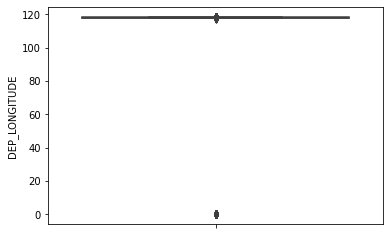

In [180]:
sns.boxplot(y=wycorder20190603.DEP_LONGITUDE)

<AxesSubplot:ylabel='DEP_LATITUDE'>

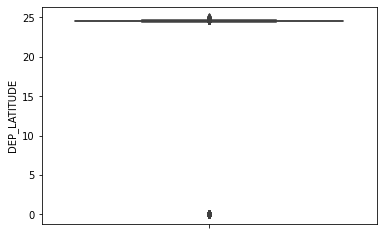

In [181]:
sns.boxplot(y=wycorder20190603.DEP_LATITUDE)

<AxesSubplot:ylabel='DEST_LONGITUDE'>

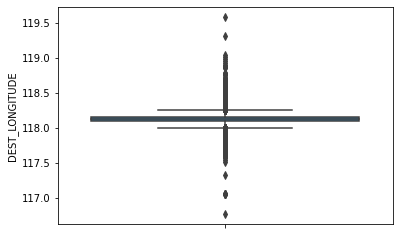

In [220]:
sns.boxplot(y=wycorder20190603.DEST_LONGITUDE)

<AxesSubplot:ylabel='DEST_LATITUDE'>

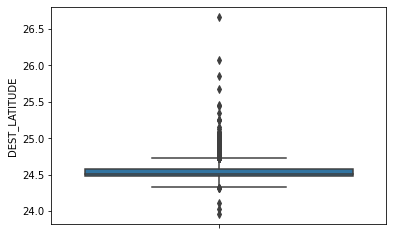

In [221]:
sns.boxplot(y=wycorder20190603.DEST_LATITUDE)

In [186]:
wycorder20190603.DEP_LONGITUDE[wycorder20190603.DEP_LONGITUDE==0]=DEP_LONGITUDE_mode
wycorder20190603.DEP_LATITUDE[wycorder20190603.DEP_LATITUDE==0]=DEP_LATITUDE_mode

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [188]:
wycorder20190603.DEP_LONGITUDE.value_counts(sort=False)
wycorder20190603.DEP_LATITUDE.value_counts(sort=False)

117.999199    1
118.095322    2
118.095398    8
118.095581    3
118.265083    1
             ..
117.986221    1
118.254951    1
118.252617    1
118.252861    9
118.253113    5
Name: DEP_LONGITUDE, Length: 20075, dtype: int64

24.581640     2
24.581631     5
24.580360     4
24.580330    18
24.581770     8
             ..
24.581289    10
24.581261     9
24.581869     1
24.581989     1
24.581600     3
Name: DEP_LATITUDE, Length: 23393, dtype: int64

In [192]:
wycorder20190603.DEP_LONGITUDE.max()
wycorder20190603.DEP_LONGITUDE.min()

118.60221099853516

117.0302963256836

<AxesSubplot:ylabel='DEP_LONGITUDE'>

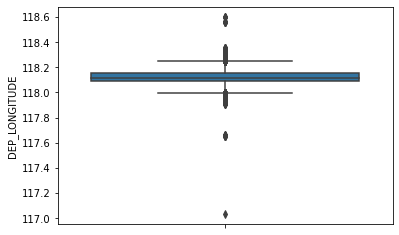

In [194]:
sns.boxplot(y=wycorder20190603.DEP_LONGITUDE)

<AxesSubplot:ylabel='DEP_LATITUDE'>

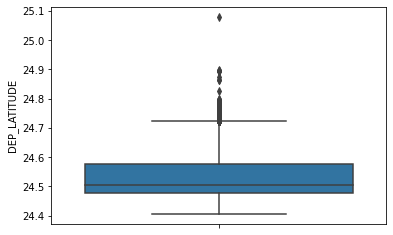

In [193]:
sns.boxplot(y=wycorder20190603.DEP_LATITUDE)

In [195]:
wycorder20190603.DEP_LATITUDE.max()
wycorder20190603.DEP_LATITUDE.min()

25.08007049560547

24.40431022644043

In [202]:
taxiorder20190603. GETON_LONGITUDE.value_counts()

0.000000      5783
118.116447     125
118.116463     120
118.116455     119
118.136009     118
              ... 
118.222893       1
118.044518       1
118.044800       1
118.222740       1
118.027596       1
Name: GETON_LONGITUDE, Length: 21301, dtype: int64

In [213]:
taxiorder20190603. GETON_LATITUDE.value_counts()

0.000000     5783
24.520687      69
24.476564      64
24.490660      62
24.473722      60
             ... 
24.542349       1
24.427000       1
24.445871       1
24.520098       1
24.445217       1
Name: GETON_LATITUDE, Length: 55631, dtype: int64

<AxesSubplot:ylabel='GETON_LONGITUDE'>

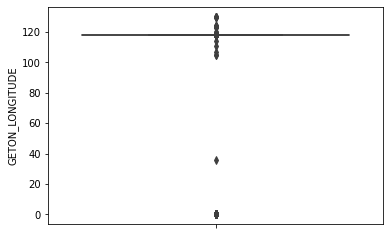

In [206]:
sns.boxplot(y=taxiorder20190603. GETON_LONGITUDE)

<AxesSubplot:ylabel='GETON_LATITUDE'>

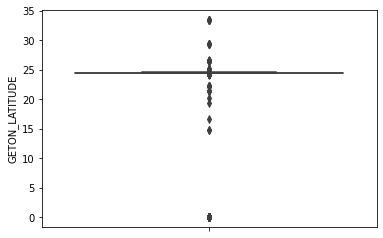

In [205]:
sns.boxplot(y=taxiorder20190603. GETON_LATITUDE)

<AxesSubplot:ylabel='GETOFF_LONGITUDE'>

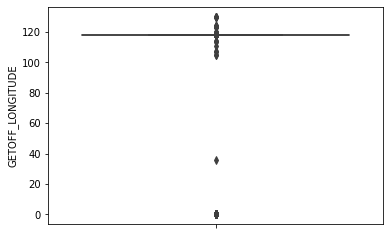

In [214]:
sns.boxplot(y=taxiorder20190603. GETOFF_LONGITUDE)

<AxesSubplot:ylabel='GETOFF_LATITUDE'>

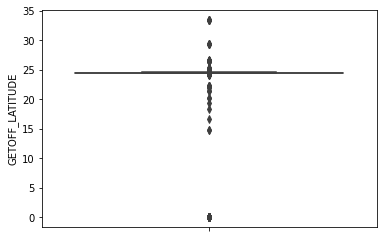

In [215]:
sns.boxplot(y=taxiorder20190603. GETOFF_LATITUDE)

In [233]:
taxiorder20190603. GETON_LONGITUDE.values.max()
taxiorder20190603. GETON_LATITUDE.values.max()
taxiorder20190603. GETOFF_LONGITUDE.values.max()
taxiorder20190603. GETOFF_LATITUDE.values.max()


129.89949

33.497204

129.89949

33.497204

In [240]:
S_GETON_LONGITUDE=taxiorder20190603. GETON_LONGITUDE.describe()
S_GETON_LATITUDE=taxiorder20190603. GETON_LATITUDE.describe()
S_GETOFF_LONGITUDE=taxiorder20190603. GETOFF_LONGITUDE.describe()
S_GETOFF_LATITUDE=taxiorder20190603. GETOFF_LATITUDE.describe()
S_GETON_LONGITUDE
S_GETON_LATITUDE
S_GETOFF_LONGITUDE
S_GETOFF_LATITUDE

count    224724.000000
mean        114.980957
std          18.689230
min           0.000000
25%         118.093880
50%         118.116493
75%         118.140854
max         129.899490
Name: GETON_LONGITUDE, dtype: float64

count    224724.000000
mean         23.871635
std           3.879720
min           0.000000
25%          24.473396
50%          24.489748
75%          24.510721
max          33.497204
Name: GETON_LATITUDE, dtype: float64

count    224724.000000
mean        116.344826
std          13.978921
min           0.000000
25%         118.093811
50%         118.116760
75%         118.142967
max         129.899490
Name: GETOFF_LONGITUDE, dtype: float64

count    224724.000000
mean         24.155590
std           2.898256
min           0.000000
25%          24.473783
50%          24.491108
75%          24.512295
max          33.497204
Name: GETOFF_LATITUDE, dtype: float64

In [239]:
S_GETON_LONGITUDE_q1 = S_GETON_LONGITUDE['25%']
S_GETON_LONGITUDE_q3 = S_GETON_LONGITUDE['75%']
S_GETON_LONGITUDE_iqr = S_GETON_LONGITUDE_q3 - S_GETON_LONGITUDE_q1
S_GETON_LONGITUDE_mi = S_GETON_LONGITUDE_q1 - 1.5*S_GETON_LONGITUDE_iqr
S_GETON_LONGITUDE_ma = S_GETON_LONGITUDE_q3 + 1.5*S_GETON_LONGITUDE_iqr
S_GETON_LONGITUDE_iqr
S_GETON_LONGITUDE_mi
S_GETON_LONGITUDE_ma

0.04697418212890625

118.02341842651367

118.2113151550293

<AxesSubplot:ylabel='GETON_LONGITUDE'>

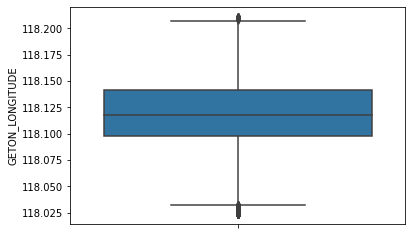

In [246]:
sns.boxplot(y=S_GETON_LONGITUDE_c)

In [247]:
S_GETON_LATITUDE_q1 = S_GETON_LATITUDE['25%']
S_GETON_LATITUDE_q3 = S_GETON_LATITUDE['75%']
S_GETON_LATITUDE_iqr = S_GETON_LATITUDE_q3 - S_GETON_LATITUDE_q1
S_GETON_LATITUDE_mi = S_GETON_LATITUDE_q1 - 1.5*S_GETON_LATITUDE_iqr
S_GETON_LATITUDE_ma = S_GETON_LATITUDE_q3 + 1.5*S_GETON_LATITUDE_iqr
S_GETON_LATITUDE_iqr
S_GETON_LATITUDE_mi
S_GETON_LATITUDE_ma

0.03732490539550781

24.41740894317627

24.5667085647583

In [250]:
S_GETOFF_LONGITUDE_q1 = S_GETOFF_LONGITUDE['25%']
S_GETOFF_LONGITUDE_q3 = S_GETOFF_LONGITUDE['75%']
S_GETOFF_LONGITUDE_iqr = S_GETOFF_LONGITUDE_q3 - S_GETOFF_LONGITUDE_q1
S_GETOFF_LONGITUDE_mi = S_GETOFF_LONGITUDE_q1 - 1.5*S_GETOFF_LONGITUDE_iqr
S_GETOFF_LONGITUDE_ma = S_GETOFF_LONGITUDE_q3 + 1.5*S_GETOFF_LONGITUDE_iqr
S_GETOFF_LONGITUDE_iqr
S_GETOFF_LONGITUDE_mi
S_GETOFF_LONGITUDE_ma
S_GETOFF_LONGITUDE_c = taxiorder20190603. GETOFF_LONGITUDE[(taxiorder20190603. GETOFF_LONGITUDE >= S_GETOFF_LONGITUDE_mi) & (taxiorder20190603. GETOFF_LONGITUDE <= S_GETOFF_LONGITUDE_ma)]
S_GETOFF_LONGITUDE_c.describe()

0.04915618896484375

118.02007675170898

118.21670150756836

count    217593.000000
mean        118.018234
std           0.106536
min         118.020111
25%         118.095978
50%         118.117462
75%         118.143181
max         118.216675
Name: GETOFF_LONGITUDE, dtype: float64

In [249]:
S_GETOFF_LATITUDE_q1 = S_GETOFF_LATITUDE['25%']
S_GETOFF_LATITUDE_q3 = S_GETOFF_LATITUDE['75%']
S_GETOFF_LATITUDE_iqr = S_GETOFF_LATITUDE_q3 - S_GETOFF_LATITUDE_q1
S_GETOFF_LATITUDE_mi = S_GETOFF_LATITUDE_q1 - 1.5*S_GETOFF_LATITUDE_iqr
S_GETOFF_LATITUDE_ma = S_GETOFF_LATITUDE_q3 + 1.5*S_GETOFF_LATITUDE_iqr
S_GETOFF_LATITUDE_iqr
S_GETOFF_LATITUDE_mi
S_GETOFF_LATITUDE_ma
S_GETOFF_LATITUDE_c = taxiorder20190603. GETOFF_LATITUDE[(taxiorder20190603. GETOFF_LATITUDE >= S_GETOFF_LATITUDE_mi) & (taxiorder20190603. GETOFF_LATITUDE <= S_GETOFF_LATITUDE_ma)]
S_GETOFF_LATITUDE_c.describe()

0.03851175308227539

24.41601586341858

24.57006287574768

count    210608.000000
mean         24.498146
std           0.027296
min          24.425306
25%          24.473736
50%          24.489784
75%          24.509460
max          24.570045
Name: GETOFF_LATITUDE, dtype: float64

In [252]:
taxiorder20190603. GETON_LONGITUDE.values.max()
taxiorder20190603. GETON_LONGITUDE.values.min()

129.89949

0.0

In [254]:
taxiorder20190603. GETON_LATITUDE.values.max()
taxiorder20190603. GETON_LATITUDE.values.min()

33.497204

0.0

In [255]:
S_GETON_LONGITUDE_c = taxiorder20190603. GETON_LONGITUDE[(taxiorder20190603. GETON_LONGITUDE >= S_GETON_LONGITUDE_mi) & (taxiorder20190603. GETON_LONGITUDE <= S_GETON_LONGITUDE_ma)]
S_GETON_LONGITUDE_c.describe()

count    216322.000000
mean        118.018082
std           0.106159
min         118.023422
25%         118.097649
50%         118.117462
75%         118.141388
max         118.211105
Name: GETON_LONGITUDE, dtype: float64

In [327]:
S_GETON_LONGITUDE_c.mean()

118.01808166503906

In [248]:
S_GETON_LATITUDE_c = taxiorder20190603. GETON_LATITUDE[(taxiorder20190603. GETON_LATITUDE >= S_GETON_LATITUDE_mi) & (taxiorder20190603. GETON_LATITUDE <= S_GETON_LATITUDE_ma)]
S_GETON_LATITUDE_c.describe()

count    210145.000000
mean         24.498026
std           0.026971
min          24.420046
25%          24.473789
50%          24.489267
75%          24.508446
max          24.566706
Name: GETON_LATITUDE, dtype: float64

In [ ]:
【回答】统计巡游车订单数据在20190603上车经纬度的最大最小值

不清洗数据的话，上车经度的最大值是129.89949,最小值是0；上车纬度最大值是33.497204，最小值是0.
按着箱型图的方式处理异常数据进行清洗的话，上车经度的最大值是118.211105，最小值是118.023422。上车纬度最大值是24.566706，最小值是24.420046。

4. 统计网约车订单数据集在20190603中下车经纬度最常见的位置？  
    - 假设经度+维度，各保留三维有效数字组合得到具体位置  
    - 小提示：可以将经纬度拼接到一起进行统计

In [294]:
pd.set_option('precision', 3)

In [313]:
wycorder20190603["DEST_LONGITUDE"]
wycorder20190603["DEST_LONGITUDE"].astype(str)
wycorder20190603["DEST_LONGITUDE"].map(str)

74460     118.132
109149    118.101
248959    118.120
64536     118.161
271997    118.137
           ...   
213812    118.172
232924    118.168
227664    118.136
270966    118.085
250007    118.097
Name: DEST_LONGITUDE, Length: 282337, dtype: float32

74460     118.13211
109149    118.10096
248959    118.11977
64536     118.16094
271997    118.13684
            ...    
213812    118.17178
232924    118.16848
227664    118.13571
270966    118.08531
250007     118.0973
Name: DEST_LONGITUDE, Length: 282337, dtype: object

74460     118.13211059570312
109149    118.10095977783203
248959    118.11976623535156
64536     118.16094207763672
271997     118.1368408203125
                 ...        
213812    118.17178344726562
232924     118.1684799194336
227664    118.13571166992188
270966    118.08531188964844
250007    118.09729766845703
Name: DEST_LONGITUDE, Length: 282337, dtype: object

In [320]:
wycorder20190603["DEST_COORDINATE"] = wycorder20190603["DEST_LONGITUDE"].round(3).astype(str) +','+ wycorder20190603["DEST_LATITUDE"].round(3).astype(str)
wycorder20190603["DEST_COORDINATE"].value_counts()

118.075,24.635    4879
118.115,24.468    2200
118.148,24.545    1985
118.131,24.535    1827
118.087,24.451    1174
                  ... 
118.249,24.566       1
118.107,24.728       1
118.137,24.627       1
117.935,24.479       1
118.226,24.636       1
Name: DEST_COORDINATE, Length: 19173, dtype: int64

In [316]:
wycorder20190603

,ORDER_ID,ON_AREA,CARNO,BOOK_DEP_TIME,WAIT_TIME,DEP_LONGITUDE,DEP_LATITUDE,DEP_TIME,DEST_LONGITUDE,DEST_LATITUDE,DEST_TIME,DRIVE_MILE,DRIVE_TIME,WAIT_MILE,ORDER_MATCH_TIME,DEST_COORDINATE
74460,35196714963341,350206,00024e2249741f6858d26aed6cdb7e51,20190603083403,NaN,118.142,24.504,20190603085852,118.132,24.494,20190603090506,2.5,360,NaN,20190603091747,"118.132,24.494"
109149,35196715678486,350206,00024e2249741f6858d26aed6cdb7e51,20190603085945,NaN,118.140,24.492,20190603091200,118.101,24.514,20190603092930,6.6,1020,NaN,20190603123746,"118.101,24.514"
248959,35196716603689,350206,00024e2249741f6858d26aed6cdb7e51,20190603093614,NaN,118.108,24.508,20190603093715,118.120,24.484,20190603094605,4.2,480,NaN,20190604110627,"118.12,24.484"
64536,35196716944334,350203,00024e2249741f6858d26aed6cdb7e51,20190603094755,NaN,118.123,24.484,20190603095112,118.161,24.515,20190603101215,9.2,1260,NaN,20190603102312,"118.161,24.515"
271997,35196717435951,350206,00024e2249741f6858d26aed6cdb7e51,20190603101821,NaN,118.155,24.508,20190603102110,118.137,24.512,20190603102736,2.5,360,NaN,20190606102436,"118.137,24.512"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213812,17632410900725,350203,ffff498ebe638d063a9fe020b5bddd68,20190603212400,NaN,118.186,24.489,20190603212846,118.172,24.474,20190603213727,3.1,480,NaN,20190603213804,"118.172,24.474"
232924,35196731450371,350206,ffff498ebe638d063a9fe020b5bddd68,20190603214458,NaN,118.178,24.490,20190603214442,118.168,24.503,20190603220236,7.0,1080,NaN,20190603220238,"118.168,24.503"
227664,35196731579248,350206,ffff498ebe638d063a9fe020b5bddd68,20190603215052,NaN,118.181,24.507,20190603215553,118.136,24.478,20190603221240,7.3,1020,NaN,20190603221324,"118.136,24.478"
270966,17632413728418,350203,ffff498ebe638d063a9fe020b5bddd68,20190603221351,NaN,118.136,24.477,20190603221907,118.085,24.446,20190603222942,8.3,600,NaN,20190605212144,"118.085,24.446"


【参考】[python合并两列](https://www.jianshu.com/p/40dc9a2316fa)

【回答】统计网约车订单数据集在20190603中下车经纬度最常见的位置是(118.075,24.635)